UPLOAD THE DATA

In [162]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [40]:
df = pd.read_csv("AirbnbIstanbul.csv")

In [41]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,554,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,2018-11-07,0.38,2,49
2,25436,House for vacation rental furnutare,105823,Yesim,NaN,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,NaN,NaN,1,83
3,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03220,28.98216,Entire home/apt,237,5,2,2018-05-04,0.04,1,228
4,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Entire home/apt,591,3,0,NaN,NaN,13,356


CLEANING THE DATA

In [42]:
df.isnull().sum() #to see  which columns have missing values, the kinds of missing values they have, and how many

id                                    0
name                                 91
host_id                               0
host_name                             7
neighbourhood_group               16251
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        8484
reviews_per_month                  8484
calculated_host_listings_count        0
availability_365                      0
dtype: int64

A total of five columns have missing values:

'name' since i will not do text based analysis of the rental names, this column won't add too much to my analysis.
Decision: DROP
'host_name' Here again, this column contains personal information and doesn't add much to my analysis. 
Decision: DROP
'neighbourhood_group': it has no data
Decision: DROP
'last_review' Since these are all dates, a missing value most likely means that there has been no review for this rental. I won't be using this for any analysis or visualization.
Decision: DROP
'reviews_per_month' We might be able to do some analysis with this. This is the kind of situation where own intuition supplements the analysis. In this column, missing values most likely do not mean that the data points were not recorded but that they don't exist, a contrast I've learned to appreciate when dealing with missing values.
Decision: REPLACE missing values with 0's

In [43]:
df.drop(columns="name", inplace = True)
df.drop(columns="host_name", inplace = True)
df.drop(columns="neighbourhood_group", inplace = True)
df.drop(columns="last_review", inplace = True)
df["reviews_per_month"].fillna(0, inplace=True)

In [44]:
df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,6603,Uskudar,41.05650,29.05367,Entire home/apt,554,1,1,0.01,1,365
1,20815,78838,Besiktas,41.06984,29.04545,Entire home/apt,100,30,41,0.38,2,49
2,25436,105823,Besiktas,41.07731,29.03891,Entire home/apt,211,21,0,0.00,1,83
3,27271,117026,Beyoglu,41.03220,28.98216,Entire home/apt,237,5,2,0.04,1,228
4,28277,121607,Sisli,41.04471,28.98567,Entire home/apt,591,3,0,0.00,13,356


ANALYZING THE DATA

In [45]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [46]:
df['neighbourhood'].unique()

array(['Uskudar', 'Besiktas', 'Beyoglu', 'Sisli', 'Sariyer', 'Beykoz',
       'Atasehir', 'Fatih', 'Adalar', 'Kadikoy', 'Kagithane', 'Maltepe',
       'Bakirkoy', 'Esenyurt', 'Basaksehir', 'Kartal', 'Gaziosmanpasa',
       'Bahcelievler', 'Bagcilar', 'Buyukcekmece', 'Silivri',
       'Beylikduzu', 'Umraniye', 'Sile', 'Cekmekoy', 'Sancaktepe',
       'Tuzla', 'Pendik', 'Sultangazi', 'Eyup', 'Zeytinburnu',
       'Kucukcekmece', 'Avcilar', 'Gungoren', 'Catalca', 'Bayrampasa',
       'Esenler', 'Sultanbeyli', 'Arnavutkoy'], dtype=object)

In [47]:
df["neighbourhood"].value_counts()

Beyoglu          4245
Sisli            2348
Fatih            2146
Kadikoy          1717
Besiktas         1367
Uskudar           594
Esenyurt          378
Kagithane         357
Sariyer           299
Maltepe           261
Atasehir          258
Bakirkoy          197
Bahcelievler      186
Adalar            162
Pendik            144
Umraniye          136
Basaksehir        131
Eyup              126
Kartal            125
Avcilar           118
Kucukcekmece      112
Buyukcekmece      107
Bagcilar           91
Beykoz             88
Zeytinburnu        75
Beylikduzu         70
Sile               59
Gaziosmanpasa      59
Tuzla              57
Gungoren           57
Cekmekoy           42
Sancaktepe         30
Silivri            25
Sultangazi         18
Bayrampasa         18
Esenler            18
Sultanbeyli        17
Arnavutkoy          7
Catalca             6
Name: neighbourhood, dtype: int64

In [235]:
neighbourhood_price = df.groupby("neighbourhood")["price"].agg(['mean'])

Text(0.5, 1.0, 'Average Price of Neighbourhoods')

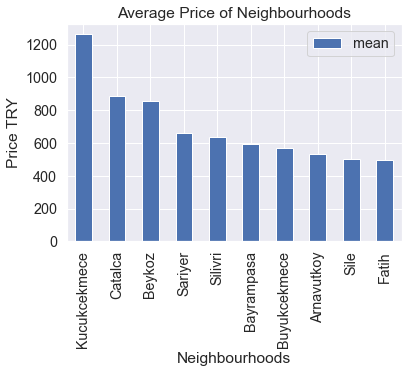

In [236]:
chart3 = neighbourhood_price.sort_values(by='mean', ascending=False).head(10).plot(kind = "bar")
chart3.set_ylabel('Price TRY')
chart3.set_xlabel('Neighbourhoods')
chart3.set_title("Average Price of Neighbourhoods")

Label Encoding for Neigbourhood and Room Type column

In [87]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
neg_encoded=le.fit_transform(df1['neighbourhood'])
rt_encoded=le.fit_transform(df1['room_type'])

In [213]:
df1 = df.copy()
df1.columns = [
'id', 'host_id', 'neighbourhood', 'latitude', 'longitude','room_type', 'price', 'minimum_nights' ,'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
neg=neg_encoded.reshape(-1, 1)
df1['neighbourhood'] = number.fit_transform(df1.neighbourhood.astype(str))
df1['room_type'] = number.fit_transform(df1.room_type.astype(str))
#x=neg
colns=['latitude', 'longitude','room_type','neighbourhood', 'minimum_nights' ,'number_of_reviews','reviews_per_month','calculated_host_listings_count']
x=df1[colns]
y=df1['price']

Making prediction with Linear Regression

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(y_test,y_pred)
print('r2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is 0.011552262029869143
mean_sqrd_error is== 625861.2862481754
root_mean_squared error of is== 791.1139527578663


changing x value as a room type

In [220]:
rt=rt_encoded.reshape(-1, 1)
x=rt
y=df1['price']

In [224]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(y_test,y_pred)
print('r2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is 0.0040827002246828226
mean_sqrd_error is== 630590.8327679586
root_mean_squared error of is== 794.0974957572645


Changing feature values as 'latitude','longitude','neighbourhood','room_type'.

In [225]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
df1['neighbourhood'] = number.fit_transform(df1.neighbourhood.astype(str))
df1['room_type'] = number.fit_transform(df1.room_type.astype(str))
colns=['latitude','longitude','neighbourhood','room_type']

x=df1[colns]
y=df1['price']


classifying neighbourhood with Decision Tree

In [226]:
colns=['latitude','longitude','price','room_type']

x=df1[colns]
y=df1['neighbourhood']

In [227]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1) #splitting data and training sets
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
result = clf.predict(x_test)
metrics.accuracy_score(y_test, result)

0.9812946098941668

predicting neighbourhood with logictis regression without label encoding

In [228]:
colns=['latitude', 'longitude','room_type', 'price', 'minimum_nights' ,'number_of_reviews','reviews_per_month','calculated_host_listings_count']

x=df1[colns]
y=df['neighbourhood']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
result = model.predict(x_test)
metrics.accuracy_score(y_test, result)

0.26458282057592913

predicting room type with logictis regression without label encoding

In [229]:
colns=['neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights' ,'number_of_reviews','reviews_per_month','calculated_host_listings_count']

x=df1[colns]
y=df['room_type']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
result = model.predict(x_test)
metrics.accuracy_score(y_test, result)

0.5926655180900812

predicting availability with linear regression

In [230]:
colns=['neighbourhood','latitude', 'longitude','room_type', 'price', 'minimum_nights' ,'number_of_reviews','reviews_per_month','calculated_host_listings_count']

x=df1[colns]
y=df1['availability_365']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(y_test,y_pred)
print('r2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is 0.036024699512258285
mean_sqrd_error is== 17442.772547908262
root_mean_squared error of is== 132.0710889934215


predicting availability with decision tree

In [231]:
colns=['neighbourhood','latitude', 'longitude','room_type', 'price', 'minimum_nights' ,'number_of_reviews','reviews_per_month','calculated_host_listings_count']
x=df1[colns]
y=df1['availability_365']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1) #splitting data and training sets
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
result = clf.predict(x_test)
metrics.accuracy_score(y_test, result)

0.17450159980310115

predicting neighbourhood with logistic regression

In [232]:
colns=['latitude', 'longitude','room_type', 'price', 'minimum_nights' ,'number_of_reviews','reviews_per_month','calculated_host_listings_count']

x=df1[colns]
y=df['neighbourhood']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
result = model.predict(x_test)
metrics.accuracy_score(y_test, result)

0.26458282057592913

In [237]:
colns=['latitude', 'longitude','room_type', 'price', 'minimum_nights' ,'number_of_reviews','reviews_per_month','calculated_host_listings_count']

x=df1[colns]
y=df['availability_365']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
result = model.predict(x_test)
metrics.accuracy_score(y_test, result)

0.2864878168840758

In [266]:
x=neg
y=rt
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(x,y)
#5 Predicting a new result
y_pred = regressor.predict(np.array([16250]).reshape(1, 1))



In [267]:
print(y_pred)

[0.17264313]


In [268]:
py_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
print(py_pred)

[0.04672084]


In [269]:
y

array([[-1.06782261],
       [-1.06782261],
       [-1.06782261],
       ...,
       [ 0.74831399],
       [ 0.74831399],
       [ 0.74831399]])